In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
df = pd.read_csv(r"D:\file project\steam-games.csv")
df

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,...,True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,Free,...,True,True,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,NaN,"₹3,999.00",...,True,False,False,0,Very Positive,89.0,12294.0,NaN,NaN,NaN
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,"₹3,599.00",...,True,False,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,Free,...,True,False,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42492,477910,Wanderer of Teandria,"26 Sep, 2017","Action, Adventure, Indie","Single-player, Steam Achievements, Steam Tradi...",Silentplaygames,Silentplaygames,₹250.00,-50%,₹125.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN
42493,1501390,KING PONG,"18 Feb, 2021","Action, Sports, Early Access","Single-player, Online PvP, Steam Achievements,...",Iconik,Iconik,₹529.00,-50%,₹264.00,...,True,False,False,1,NaN,NaN,NaN,NaN,NaN,NaN
42494,2683250,Falnarion Tactics III,"25 Dec, 2023",Strategy,"Single-player, Steam Achievements, Steam Cloud...",Team Syukino,Team Syukino,NaN,NaN,₹610.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN
42495,1508840,Great Exploration VR: New Colony beyond Viking...,"12 Jan, 2021","Action, Casual","Single-player, Tracked Controller Support, VR ...",William at Oxford,William at Oxford,₹199.00,-51%,₹97.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42497 entries, 0 to 42496
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   app_id                42497 non-null  int64  
 1   title                 42497 non-null  object 
 2   release_date          42440 non-null  object 
 3   genres                42410 non-null  object 
 4   categories            42452 non-null  object 
 5   developer             42307 non-null  object 
 6   publisher             42286 non-null  object 
 7   original_price        4859 non-null   object 
 8   discount_percentage   4859 non-null   object 
 9   discounted_price      42257 non-null  object 
 10  dlc_available         42497 non-null  int64  
 11  age_rating            42497 non-null  int64  
 12  content_descriptor    2375 non-null   object 
 13  about_description     42359 non-null  object 
 14  win_support           42497 non-null  bool   
 15  mac_support        

In [4]:
df.head(10)

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,...,True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,Free,...,True,True,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,NaN,"₹3,999.00",...,True,False,False,0,Very Positive,89.0,12294.0,NaN,NaN,NaN
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,"₹3,599.00",...,True,False,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,Free,...,True,False,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0
5,1091500,Cyberpunk 2077,"9 Dec, 2020",RPG,"Single-player, Steam Achievements, Steam Tradi...",CD PROJEKT RED,CD PROJEKT RED,"₹2,999.00",-50%,"₹1,499.00",...,True,False,False,4,Very Positive,83.0,654304.0,Very Positive,94.0,7771.0
6,1086940,Baldur's Gate 3,"3 Aug, 2023","Adventure, RPG, Strategy","Single-player, Online Co-op, LAN Co-op, Steam ...",Larian Studios,Larian Studios,NaN,NaN,"₹2,999.00",...,True,True,False,2,Overwhelmingly Positive,96.0,543077.0,Overwhelmingly Positive,96.0,9642.0
7,578080,PUBG: BATTLEGROUNDS,"21 Dec, 2017","Action, Adventure, Massively Multiplayer, Free...","Online PvP, Stats, Remote Play on Phone, Remot...","KRAFTON, Inc.","KRAFTON, Inc.",NaN,NaN,Free,...,True,False,False,1,Mixed,58.0,2361734.0,Mixed,68.0,19214.0
8,1172470,Apex Legends™,"4 Nov, 2020","Action, Adventure, Free to Play","Online PvP, Online Co-op, Steam Achievements, ...",Respawn,Electronic Arts,NaN,NaN,Free,...,True,False,False,2,Mostly Positive,77.0,828477.0,Mixed,60.0,11524.0
9,1142710,Total War: WARHAMMER III,"16 Feb, 2022","Action, Strategy","Single-player, Online PvP, LAN PvP, Online Co-...",CREATIVE ASSEMBLY,SEGA,"₹4,499.00",-50%,"₹2,249.00",...,True,True,True,0,Mixed,65.0,70065.0,Very Positive,86.0,1593.0


In [5]:
df.tail(10)

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
42487,1580510,VR Fighter Jets War,"4 May, 2021","Adventure, Casual, Simulation","Single-player, Tracked Controller Support, VR ...",William at Oxford,William at Oxford,₹125.00,-58%,₹53.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN
42488,2215340,Shishi : Timeless Prelude,"27 Jul, 2023","Adventure, Casual, Indie, RPG","Single-player, Steam Achievements, Steam Cloud...",Shishi Studios,Shishi Studios,NaN,NaN,₹880.00,...,True,False,False,1,NaN,NaN,NaN,NaN,NaN,NaN
42489,2509290,"Cars, Girls and Rock 'n' Roll","18 Sep, 2023",Racing,"Single-player, Family Sharing, Profile Feature...",SP GAMES,SP GAMES,NaN,NaN,₹105.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN
42490,2795030,Timber,"28 Feb, 2024","Action, Indie, Simulation, Strategy","Single-player, Steam Achievements, Steam Cloud...",CaliCosDev Studio,CaliCosDev Studio,NaN,NaN,₹200.00,...,True,True,False,0,NaN,NaN,NaN,NaN,NaN,NaN
42491,652460,Fragmentum,"1 May, 2018","Indie, Strategy","Single-player, Online PvP, Cross-Platform Mult...",Lundar Games,Lundar Games,NaN,NaN,₹105.00,...,True,False,True,0,NaN,NaN,NaN,NaN,NaN,NaN
42492,477910,Wanderer of Teandria,"26 Sep, 2017","Action, Adventure, Indie","Single-player, Steam Achievements, Steam Tradi...",Silentplaygames,Silentplaygames,₹250.00,-50%,₹125.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN
42493,1501390,KING PONG,"18 Feb, 2021","Action, Sports, Early Access","Single-player, Online PvP, Steam Achievements,...",Iconik,Iconik,₹529.00,-50%,₹264.00,...,True,False,False,1,NaN,NaN,NaN,NaN,NaN,NaN
42494,2683250,Falnarion Tactics III,"25 Dec, 2023",Strategy,"Single-player, Steam Achievements, Steam Cloud...",Team Syukino,Team Syukino,NaN,NaN,₹610.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN
42495,1508840,Great Exploration VR: New Colony beyond Viking...,"12 Jan, 2021","Action, Casual","Single-player, Tracked Controller Support, VR ...",William at Oxford,William at Oxford,₹199.00,-51%,₹97.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN
42496,1191080,SANCTION,"10 Jun, 2022","Action, Adventure, Casual, Indie, Simulation, ...","Single-player, Steam Achievements, Family Shar...",LethalLizard Studios,LethalLizard Studios,NaN,NaN,₹450.00,...,True,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['app_id', 'title', 'release_date', 'genres', 'categories', 'developer',
       'publisher', 'original_price', 'discount_percentage',
       'discounted_price', 'dlc_available', 'age_rating', 'content_descriptor',
       'about_description', 'win_support', 'mac_support', 'linux_support',
       'awards', 'overall_review', 'overall_review_%', 'overall_review_count',
       'recent_review', 'recent_review_%', 'recent_review_count'],
      dtype='object')

In [7]:
df.shape

(42497, 24)

In [8]:
df.dtypes

app_id                    int64
title                    object
release_date             object
genres                   object
categories               object
developer                object
publisher                object
original_price           object
discount_percentage      object
discounted_price         object
dlc_available             int64
age_rating                int64
content_descriptor       object
about_description        object
win_support                bool
mac_support                bool
linux_support              bool
awards                    int64
overall_review           object
overall_review_%        float64
overall_review_count    float64
recent_review            object
recent_review_%         float64
recent_review_count     float64
dtype: object

In [9]:
df.describe()

,app_id,dlc_available,age_rating,awards,overall_review_%,overall_review_count,recent_review_%,recent_review_count
count,4.249700e+04,42497.000000,42497.000000,42497.000000,40020.000000,4.002000e+04,5503.000000,5503.000000
mean,1.245812e+06,0.722004,0.055886,0.309528,77.162569,2.500621e+03,82.303107,282.100491
std,7.553906e+05,4.673810,0.229705,1.264100,17.672036,4.887980e+04,15.110260,4583.606042
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000e+01,6.000000,10.000000
25%,5.892200e+05,0.000000,0.000000,0.000000,68.000000,2.100000e+01,75.000000,16.000000
50%,1.144860e+06,0.000000,0.000000,0.000000,81.000000,5.900000e+01,86.000000,34.000000
75%,1.822640e+06,0.000000,0.000000,0.000000,91.000000,2.820000e+02,93.000000,102.000000
max,3.008050e+06,200.000000,1.000000,41.000000,100.000000,8.062218e+06,100.000000,328633.000000


In [10]:
df.value_counts()

app_id   title                              release_date  genres                    categories                                                                                                                                                                                                developer               publisher                original_price  discount_percentage  discounted_price  dlc_available  age_rating  content_descriptor                                                                             about_description                                                                                                                                                                                                                                                                             win_support  mac_support  linux_support  awards  overall_review   overall_review_%  overall_review_count  recent_review    recent_review_%  recent_review_count
6910     Deus Ex: Game of the Year Edition

In [11]:
df.isnull().sum()

app_id                      0
title                       0
release_date               57
genres                     87
categories                 45
developer                 190
publisher                 211
original_price          37638
discount_percentage     37638
discounted_price          240
dlc_available               0
age_rating                  0
content_descriptor      40122
about_description         138
win_support                 0
mac_support                 0
linux_support               0
awards                      0
overall_review           2477
overall_review_%         2477
overall_review_count     2477
recent_review           36994
recent_review_%         36994
recent_review_count     36994
dtype: int64

In [12]:
df.dropna(how='any', inplace = True)
df.isnull().sum()

app_id                  0
title                   0
release_date            0
genres                  0
categories              0
developer               0
publisher               0
original_price          0
discount_percentage     0
discounted_price        0
dlc_available           0
age_rating              0
content_descriptor      0
about_description       0
win_support             0
mac_support             0
linux_support           0
awards                  0
overall_review          0
overall_review_%        0
overall_review_count    0
recent_review           0
recent_review_%         0
recent_review_count     0
dtype: int64

In [13]:
df.shape

(142, 24)

In [14]:
df.duplicated().sum()

0

In [15]:
df.nunique()

app_id                  142
title                   142
release_date            139
genres                   43
categories               85
developer               112
publisher                61
original_price           81
discount_percentage      29
discounted_price        103
dlc_available            23
age_rating                1
content_descriptor       63
about_description       142
win_support               1
mac_support               2
linux_support             2
awards                   13
overall_review            5
overall_review_%         44
overall_review_count    142
recent_review             5
recent_review_%          48
recent_review_count     111
dtype: int64

In [16]:
df.head()

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
5,1091500,Cyberpunk 2077,"9 Dec, 2020",RPG,"Single-player, Steam Achievements, Steam Tradi...",CD PROJEKT RED,CD PROJEKT RED,"₹2,999.00",-50%,"₹1,499.00",...,True,False,False,4,Very Positive,83.0,654304.0,Very Positive,94.0,7771.0
9,1142710,Total War: WARHAMMER III,"16 Feb, 2022","Action, Strategy","Single-player, Online PvP, LAN PvP, Online Co-...",CREATIVE ASSEMBLY,SEGA,"₹4,499.00",-50%,"₹2,249.00",...,True,True,True,0,Mixed,65.0,70065.0,Very Positive,86.0,1593.0
14,271590,Grand Theft Auto V,"13 Apr, 2015","Action, Adventure","Single-player, Online PvP, Online Co-op, Steam...",Rockstar North,Rockstar Games,"₹2,638.00",-64%,₹952.00,...,True,False,False,2,Very Positive,87.0,1640234.0,Very Positive,91.0,15926.0
21,306130,The Elder Scrolls® Online,"22 May, 2017","Action, Adventure, Massively Multiplayer, RPG","MMO, Online PvP, Online Co-op, Steam Trading C...",ZeniMax Online Studios,Bethesda Softworks,"₹1,599.00",-70%,₹479.00,...,True,True,False,0,Very Positive,83.0,120455.0,Very Positive,81.0,730.0
33,594650,Hunt: Showdown,"27 Aug, 2019",Action,"Online PvP, Online Co-op, Steam Achievements, ...",Crytek,Crytek,"₹1,499.00",-65%,₹524.00,...,True,False,False,8,Very Positive,82.0,156839.0,Mostly Positive,73.0,1747.0


In [17]:
df.tail()

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
5016,493540,Figment,"22 Sep, 2017","Action, Adventure, Casual, Indie","Single-player, Steam Achievements, Steam Tradi...",Bedtime Digital Games,Bedtime Digital Games,₹529.00,-80%,₹105.00,...,True,True,True,17,Very Positive,88.0,1042.0,Very Positive,83.0,12.0
5205,380150,STASIS,"31 Aug, 2015","Adventure, Indie","Single-player, Steam Achievements, Steam Tradi...",THE BROTHERHOOD,THE BROTHERHOOD,₹400.00,-50%,₹200.00,...,True,True,False,5,Mostly Positive,79.0,1413.0,Very Positive,80.0,10.0
6365,305380,Blue Estate The Game,"8 Apr, 2015",Action,"Single-player, Steam Achievements, Steam Tradi...",HE SAW,HE SAW,₹439.00,-65%,₹153.00,...,True,False,False,0,Very Positive,91.0,1225.0,Very Positive,80.0,10.0
38422,409720,BioShock™ 2 Remastered,"15 Sep, 2016","Action, RPG","Single-player, Steam Achievements, Steam Cloud...",2K Marin,2K,₹999.00,-85%,₹149.00,...,True,True,False,0,Mixed,69.0,18858.0,Mostly Positive,74.0,187.0
38603,258180,Deus Ex: The Fall,"17 Mar, 2014","Action, Adventure, RPG","Single-player, Steam Achievements, Steam Tradi...",Eidos Interactive Corp.,Eidos Interactive Corp.,₹499.00,-80%,₹99.00,...,True,False,False,0,Mostly Negative,36.0,3457.0,Mixed,68.0,16.0


In [18]:
df.drop(['app_id','recent_review','title', 'overall_review_count', 'linux_support', 'mac_support','about_description',"overall_review","content_descriptor","age_rating","win_support","recent_review_count","recent_review_%","release_date","categories"], axis = 1, inplace = True)

In [19]:
df

,genres,developer,publisher,original_price,discount_percentage,discounted_price,dlc_available,awards,overall_review_%
5,RPG,CD PROJEKT RED,CD PROJEKT RED,"₹2,999.00",-50%,"₹1,499.00",3,4,83.0
9,"Action, Strategy",CREATIVE ASSEMBLY,SEGA,"₹4,499.00",-50%,"₹2,249.00",23,0,65.0
14,"Action, Adventure",Rockstar North,Rockstar Games,"₹2,638.00",-64%,₹952.00,1,2,87.0
21,"Action, Adventure, Massively Multiplayer, RPG",ZeniMax Online Studios,Bethesda Softworks,"₹1,599.00",-70%,₹479.00,5,0,83.0
33,Action,Crytek,Crytek,"₹1,499.00",-65%,₹524.00,53,8,82.0
...,...,...,...,...,...,...,...,...,...
5016,"Action, Adventure, Casual, Indie",Bedtime Digital Games,Bedtime Digital Games,₹529.00,-80%,₹105.00,1,17,88.0
5205,"Adventure, Indie",THE BROTHERHOOD,THE BROTHERHOOD,₹400.00,-50%,₹200.00,2,5,79.0
6365,Action,HE SAW,HE SAW,₹439.00,-65%,₹153.00,0,0,91.0
38422,"Action, RPG",2K Marin,2K,₹999.00,-85%,₹149.00,1,0,69.0


df_discounted_price=lambda x: str(x).split('₹')[0]
df.Rate=df.discounted_price.apply(df_discounted_price)
df['discounted_price'].head()

In [20]:
df['discounted_price'] = df['discounted_price'].str.replace(',', '').str.replace('₹', '')
df['original_price'] = df['original_price'].str.replace(',', '').str.replace('₹', '')
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').str.replace('-', '')

In [21]:
df

,genres,developer,publisher,original_price,discount_percentage,discounted_price,dlc_available,awards,overall_review_%
5,RPG,CD PROJEKT RED,CD PROJEKT RED,2999.00,50,1499.00,3,4,83.0
9,"Action, Strategy",CREATIVE ASSEMBLY,SEGA,4499.00,50,2249.00,23,0,65.0
14,"Action, Adventure",Rockstar North,Rockstar Games,2638.00,64,952.00,1,2,87.0
21,"Action, Adventure, Massively Multiplayer, RPG",ZeniMax Online Studios,Bethesda Softworks,1599.00,70,479.00,5,0,83.0
33,Action,Crytek,Crytek,1499.00,65,524.00,53,8,82.0
...,...,...,...,...,...,...,...,...,...
5016,"Action, Adventure, Casual, Indie",Bedtime Digital Games,Bedtime Digital Games,529.00,80,105.00,1,17,88.0
5205,"Adventure, Indie",THE BROTHERHOOD,THE BROTHERHOOD,400.00,50,200.00,2,5,79.0
6365,Action,HE SAW,HE SAW,439.00,65,153.00,0,0,91.0
38422,"Action, RPG",2K Marin,2K,999.00,85,149.00,1,0,69.0


## Label

In [22]:
encoder = LabelEncoder()

In [23]:
df["publisher"] = encoder.fit_transform(df["publisher"])
df["developer"] = encoder.fit_transform(df["developer"])
df["genres"] = encoder.fit_transform(df["genres"])

In [24]:
df.dtypes

genres                   int32
developer                int32
publisher                int32
original_price          object
discount_percentage     object
discounted_price        object
dlc_available            int64
awards                   int64
overall_review_%       float64
dtype: object

In [25]:
df['discounted_price'].unique()

array(['1499.00', '2249.00', '952.00', '479.00', '524.00', '359.00',
       '449.00', '425.00', '1679.00', '749.00', '599.00', '239.00',
       '734.00', '3512.00', '824.00', '549.00', '448.00', '527.00',
       '629.00', '2100.00', '216.00', '280.00', '545.00', '202.00',
       '1072.00', '1999.00', '344.00', '420.00', '299.00', '149.00',
       '804.00', '480.00', '3429.00', '264.00', '324.00', '1253.00',
       '989.00', '1399.00', '432.00', '720.00', '98.00', '374.00',
       '212.00', '434.00', '1980.00', '2217.00', '220.00', '999.00',
       '130.00', '399.00', '650.00', '329.00', '56.00', '858.00',
       '2402.00', '3955.00', '1349.00', '96.00', '229.00', '185.00',
       '113.00', '459.00', '639.00', '138.00', '90.00', '224.00',
       '269.00', '1967.00', '184.00', '189.00', '194.00', '419.00',
       '345.00', '636.00', '539.00', '429.00', '249.00', '353.00',
       '2871.00', '119.00', '97.00', '141.00', '1012.00', '114.00',
       '1121.00', '503.00', '600.00', '339.00', '

In [26]:
df

,genres,developer,publisher,original_price,discount_percentage,discounted_price,dlc_available,awards,overall_review_%
5,35,15,12,2999.00,50,1499.00,3,4,83.0
9,21,16,39,4499.00,50,2249.00,23,0,65.0
14,1,74,37,2638.00,64,952.00,1,2,87.0
21,10,110,10,1599.00,70,479.00,5,0,83.0
33,0,20,14,1499.00,65,524.00,53,8,82.0
...,...,...,...,...,...,...,...,...,...
5016,3,8,9,529.00,80,105.00,1,17,88.0
5205,24,84,44,400.00,50,200.00,2,5,79.0
6365,0,43,25,439.00,65,153.00,0,0,91.0
38422,19,0,1,999.00,85,149.00,1,0,69.0


In [27]:
df['discounted_price']=df['discounted_price'].astype(float)
df['original_price']=df['original_price'].astype(float)
df['original_price']=df['original_price'].astype(int)
df['discount_percentage']=df['discount_percentage'].astype(int)

In [28]:
df.dtypes

genres                   int32
developer                int32
publisher                int32
original_price           int32
discount_percentage      int32
discounted_price       float64
dlc_available            int64
awards                   int64
overall_review_%       float64
dtype: object

In [29]:
 df[(df >= 0).all(axis=1)]

,genres,developer,publisher,original_price,discount_percentage,discounted_price,dlc_available,awards,overall_review_%
5,35,15,12,2999,50,1499.0,3,4,83.0
9,21,16,39,4499,50,2249.0,23,0,65.0
14,1,74,37,2638,64,952.0,1,2,87.0
21,10,110,10,1599,70,479.0,5,0,83.0
33,0,20,14,1499,65,524.0,53,8,82.0
...,...,...,...,...,...,...,...,...,...
5016,3,8,9,529,80,105.0,1,17,88.0
5205,24,84,44,400,50,200.0,2,5,79.0
6365,0,43,25,439,65,153.0,0,0,91.0
38422,19,0,1,999,85,149.0,1,0,69.0


In [30]:
df.dtypes

genres                   int32
developer                int32
publisher                int32
original_price           int32
discount_percentage      int32
discounted_price       float64
dlc_available            int64
awards                   int64
overall_review_%       float64
dtype: object

In [31]:
x = df.drop(['discounted_price'],axis=1)
y = df["discounted_price"]

In [32]:
x.head(10)

,genres,developer,publisher,original_price,discount_percentage,dlc_available,awards,overall_review_%
5,35,15,12,2999,50,3,4,83.0
9,21,16,39,4499,50,23,0,65.0
14,1,74,37,2638,64,1,2,87.0
21,10,110,10,1599,70,5,0,83.0
33,0,20,14,1499,65,53,8,82.0
35,35,10,10,1799,80,1,0,94.0
40,12,100,51,2999,85,3,1,89.0
41,35,15,12,1699,75,22,2,96.0
48,9,14,11,2799,40,2,8,76.0
53,21,16,39,2999,75,22,7,93.0


In [33]:
y.head(10)

5     1499.0
9     2249.0
14     952.0
21     479.0
33     524.0
35     359.0
40     449.0
41     425.0
48    1679.0
53     749.0
Name: discounted_price, dtype: float64

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.4, random_state=2)

In [35]:
x_train

,genres,developer,publisher,original_price,discount_percentage,dlc_available,awards,overall_review_%
334,42,32,1,2999,95,7,1,84.0
1234,1,23,7,1199,75,0,0,89.0
4531,1,4,54,565,80,0,0,43.0
1166,1,35,22,2199,75,6,0,74.0
3266,1,24,7,729,85,8,0,84.0
...,...,...,...,...,...,...,...,...
1085,1,73,37,1499,50,0,0,83.0
473,42,97,51,2999,67,2,0,51.0
125,12,56,54,2169,90,8,0,88.0
990,6,91,48,529,65,1,1,91.0


In [36]:
x_test

,genres,developer,publisher,original_price,discount_percentage,dlc_available,awards,overall_review_%
3574,22,106,55,690,72,0,0,77.0
1793,13,77,4,589,40,1,5,96.0
1574,14,83,7,3599,85,21,0,70.0
406,8,12,34,810,60,3,1,91.0
21,10,110,10,1599,70,5,0,83.0
156,36,18,24,1819,70,4,2,77.0
524,0,88,46,983,90,0,4,95.0
1638,23,61,34,880,70,2,5,88.0
14,1,74,37,2638,64,1,2,87.0
35,35,10,10,1799,80,1,0,94.0


In [37]:
y_train

334     149.0
1234    299.0
4531    113.0
1166    549.0
3266    109.0
        ...  
1085    749.0
473     989.0
125     216.0
990     185.0
88      824.0
Name: discounted_price, Length: 85, dtype: float64

In [38]:
y_test

3574      193.0
1793      353.0
1574      539.0
406       324.0
21        479.0
156       545.0
524        98.0
1638      264.0
14        952.0
35        359.0
953       229.0
2583      249.0
1283      269.0
128       280.0
1522      636.0
625       220.0
497       629.0
68        734.0
724       650.0
1301     1967.0
3268      212.0
1740      429.0
2580      600.0
2651      452.0
2364      749.0
2728      109.0
160       599.0
475      1399.0
4108      342.0
1054      324.0
862      2402.0
85        749.0
65        239.0
194      1072.0
5        1499.0
38422     149.0
342       804.0
838       858.0
101       629.0
2174       97.0
2476      224.0
76       3512.0
230      1999.0
1499      345.0
1491      194.0
1992      220.0
3619      244.0
40        449.0
2433      149.0
620      2217.0
201       824.0
1745      269.0
116      2100.0
607      1980.0
90        549.0
1250      138.0
181       599.0
Name: discounted_price, dtype: float64

In [39]:
zx = LogisticRegression ()


In [40]:
zx.fit(x_train,y_train)

D:\ANACONA\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
tranning_data_prediction = zx.predict(x_train)

In [42]:
y_train = y_train[tranning_data_prediction >= 0]
tranning_data_prediction = tranning_data_prediction[tranning_data_prediction >= 0]

In [43]:
error_score = metrics.r2_score(y_train,tranning_data_prediction)*100
print("R squred error :", error_score)

R squred error : 99.01354596103553


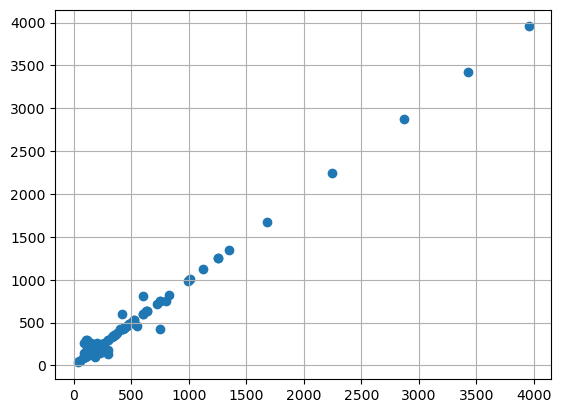

In [44]:
plt.scatter(y_train, tranning_data_prediction)
plt.grid()

In [45]:
print(zx.predict([[35,15,12,2999,50,3,4,83.0]]))

[1679.]


D:\ANACONA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
print(zx.predict([[21,16,39,4499,50,23,0,65.0]]))

[2249.]


D:\ANACONA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
print(zx.predict([[1,74,37,2638,64,1,2,87.0]]))

[1012.]


D:\ANACONA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
print(zx.predict([[10,110,10,1599,70,5,0,83.0]]))

[420.]


D:\ANACONA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
print(zx.predict([[0,4,14,1499,65,53,8,82.0]]))

[524.]


D:\ANACONA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
print(zx.predict([[35,10,10,1799,80,1,0,94.0]]))

[149.]


D:\ANACONA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
